# ch7. decision tree classifier
이번 챕터에서는 직접 titanic 데이터 셋으로 decision tree 분류기를 학습시켜 보겠습니다. 그리고 학습된 모델의 정확도를 평가해보겠습니다.

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## 데이터 셋 준비
미리 전처리 해놓은 데이터 셋을 불러온 뒤, 학습 데이터 셋은 종속 변수와 독립 변수를 분리하겠습니다.

In [2]:
import pandas as pd

train_df = pd.read_csv("./data/preprocessed_train.csv")
test_df = pd.read_csv("./data/preprocessed_test.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.560331,0.125,0.000000,-0.898323,0.1,0,1,0,0,1
1,2,1,1,0.655107,0.125,0.000000,1.343689,0.1,0,0,1,0,0
2,3,1,3,-0.256471,0.000,0.000000,-0.817085,0.0,1,0,0,0,1
3,4,1,1,0.427212,0.125,0.000000,1.044367,0.1,0,0,0,0,1
4,5,0,3,0.427212,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.180507,0.000,0.000000,-0.352025,0.0,1,1,0,0,1
887,888,1,1,-0.788225,0.000,0.000000,0.469141,0.0,1,0,0,0,1
888,889,0,3,-0.546252,0.125,0.222222,0.223950,0.3,0,0,0,0,1
889,890,1,1,-0.256471,0.000,0.000000,0.469141,0.0,1,1,1,0,0


In [4]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.389230,0.000,0.000000,-0.828233,0.0,1,1,0,1,0
1,893,3,1.338790,0.125,0.000000,-0.930111,0.1,0,0,0,0,1
2,894,2,2.478263,0.000,0.000000,-0.630918,0.0,1,1,0,1,0
3,895,3,-0.180507,0.000,0.000000,-0.735068,0.0,1,1,0,0,1
4,896,3,-0.560331,0.125,0.111111,-0.405983,0.2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
414,1306,1,0.731072,0.000,0.000000,1.776495,0.0,1,0,1,0,0
415,1307,3,0.693089,0.000,0.000000,-0.898323,0.0,1,1,0,0,1
416,1308,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1


예측 모델을 학습시키기 위해선 먼저 예측을 하고자하는 종속 변수와 예측에 사용되는 독립 변수를 분리해주어야 합니다.

In [5]:
y_train = train_df["Survived"]
x_train = train_df.drop(["PassengerId", "Survived"], axis=1)

In [6]:
x_test = test_df.drop(["PassengerId"], axis=1)

## DecisionTree 기반 분류 모델 생성 및 학습
scikit-learn에 내장된 Decision Tree 알고리즘으로 분류 모델을 생성하고 학습시켜 보겠습니다. 이 때, max_depth는 의사 결정 트리의 최대 깊이입니다. 이처럼 모델의 형태나 정확도에 관여하는 파라미터들을 hyper paramter라고 부릅니다. 한번 max_depth를 설정하지 않고 decision tree 모델을 학습시켜 보겠습니다.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier(
    criterion="entropy"
)

In [9]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

학습된 모델의 정확도는 이렇게 간단하게 확인이 가능합니다.

In [10]:
acc = round(model.score(x_train, y_train) * 100, 2)
print(f"학습 데이터 셋에 대한 모델 정확도: {acc}")

학습 데이터 셋에 대한 모델 정확도: 98.2


## Cross Validation

train 셋에 대해서 무려 98.2%의 정확도가 나왔네요. 그런데 가만히 생각해보면 좀 이상합니다. x_train에 대해서 학습을 진행했고, 성능 검사고 y_train을 대상으로 진행헀습니다. 모델 입장에선 학습과정에서 본 데이터에 대해 다시 추론을 하는 격이므로 당연히 성능이 높게 나오므로, 이는 신뢰할 수 없는 수치입니다. 이럴 때 사용할 수 있는 방법이 교차검증입니다. 그 중에서도 k-fold validation이라는 기법을 배워보겠습니다.

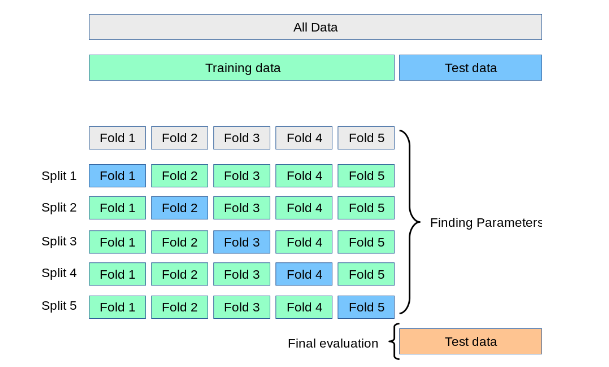

k-fold validation이란 train set을 K 등분 한 뒤, 그 중에 하나를 validation set으로 삼는 것입니다. validation set을 제외한 나머지 데이터로 모델을 학습시키고, validation set으로 성능을 검증합니다. 이렇게 하면 학습하지 않은 데이터에 대해서 모델이 어떻게 동작하는 지를 확인할 수 있습니다. 이를 K번 반복하여 평균을 내면 모델의 성능에 대해서 어느 정도 신뢰할 수 있는 성능 지표를 얻을 수 있습니다. 

In [11]:
from sklearn.model_selection import cross_val_score, KFold

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=1234)

In [13]:
model = DecisionTreeClassifier(criterion="entropy", random_state=1234)

In [14]:
cross_val_scores = cross_val_score(model, x_train, y_train, cv=kf)

In [15]:
print(cross_val_scores)
print("평균 정확도: ", cross_val_scores.mean())

[0.83798883 0.78089888 0.76404494 0.7752809  0.79775281]
평균 정확도:  0.791193270981106


교차 검증 결과 decision tree classifier를 이용할 경우, 평균 79%의 정확도가 나온다는 것을 확인할 수 있었습니다. 

## 전체 데이터 셋에 대해서 학습 및 추론
데이터가 부족한 상황에서 프러덕션 환경에 적용할 모델을 학습시킬 때에는 교차 검증용으로 데이터를 따로 분리하지 않고, 전체 train set으로 최종 학습시킨 뒤에 적용합니다. 우리는 kaggle에 제출하는 것으로 프러덕션 환경을 대체해보겠습니다.

In [16]:
model = DecisionTreeClassifier(criterion="entropy", random_state=1234)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [17]:
y_test = model.predict(x_test)

In [18]:
test_df["Survived"] = y_test

In [19]:
test_df[["PassengerId", "Survived"]].to_csv("./data/submission.csv", index=False)

## kaggle에 제출하기
https://www.kaggle.com/competitions/titanic/ 로 이동해서 csv 파일을 제출해보겠습니다.

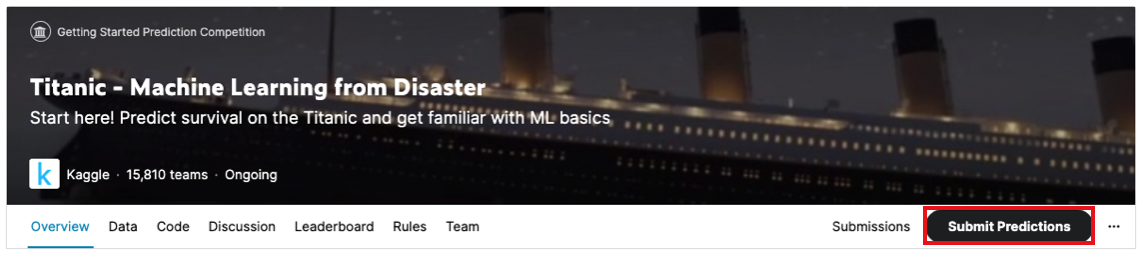

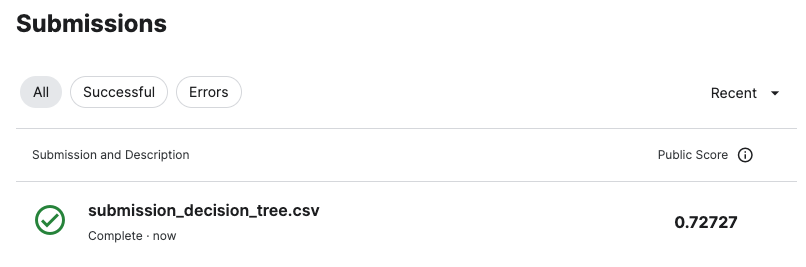

교차 검증으로 정확도를 측정했을 때에는 약 78% 정확도를 보였습니다만 실제로 test set에 적용해보니 72.7% 정확도를 보였습니다. 이처럼 학습 데이터 셋에 최적화 되어, 다른 케이스들에 대해서 정확도가 떨어지는 현상을 overfitting이라고 부릅니다. 

## 정리
지금까지 기본적은 decision tree 모델을 학습시켜 보았습니다. 그리고 교차 검증을 적용하여 모델의 성능을 비교적 정확하게 측정하였습니다. 이를 바탕으로 테스트 셋에 대해 추론을 한 뒤, kaggle에 제출까지 해보았고, 현재의 모델이 학습 데이터 셋에 overfitting 되었다는 결론을 냈습니다. 이어지는 챕터에서는 학습시킨 decision tree 모델을 시각화 하고, overfitting을 방지할 수 있는 여러 기법들을 배워봅니다.